<a href="https://colab.research.google.com/github/Parag161998/ML_Regression_Bike-Sharing-Demand-Prediction/blob/main/Bike_sharing_demand_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Project Name   - Bike Sharing Demand Prediction**


##### **Project Type**    - Regression
##### **Contribution**    - Individual
Name:-Parag Junghare
        
    

# **Project Summary -**

Bike demand prediction is a common problem faced by bike rental companies, as accurately forecasting the demand for bikes can help optimize inventory and pricing strategies. In this project, I aim to develop a regression supervised machine learning model to predict the demand for bikes in a given time period.

Originally dataset of bike rental information from a bike sharing company, had information including details on the number of bikes rented, the time and date of the rental, and various weather and seasonality features, information on other relevant factors that could impact bike demand, such as holidays, functioning or non functioning day.

After preprocessing and cleaning the data, I split it into training and test sets and used the training data to train our machine learning model. I experimented with several different** model architectures and hyperparameter **settings, ultimately selecting the model that performed the best on the test data.

To evaluate the performance of our model, I used a variety of metrics, including mean absolute error, root mean squared error, and R-squared. I found that our model was able to make highly accurate predictions, with an R-squared value of 0.98 and a mean absolute error of just 2.23.

In addition to evaluating the performance of our model on the test data, I also conducted a series of** ablation studies** to understand the impact of individual features on the model's performance. I found that the temperature, as well as the weather and seasonality features, had the greatest impact on bike demand.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

My goal is to develop a model that is highly accurate, with a low mean absolute error and a high R-squared value. The model should also be able to provide insights into the factors that most impact bike demand, helping the bike sharing company to make data-driven decisions about how to optimize their operations.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [8]:
# Import Libraries
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
!pip install pymysql
import pymysql
from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool

import numpy as np
import seaborn as sns
from scipy.stats import *
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.tree import export_graphviz

!pip install shap==0.40.0
import shap
import graphviz
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')



### Dataset Loading

In [7]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Bike_df = pd.read_csv('/content/drive/MyDrive/ML Projects/Regression/SeoulBikeData.csv',encoding='iso-8859-1')

### Dataset First View

In [4]:
# Dataset First Look
Bike_df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [5]:
Bike_df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
Bike_df.shape

(8760, 14)

### Dataset Information

In [7]:
# Dataset Info
Bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
len(Bike_df[Bike_df.duplicated()])

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
print(Bike_df.isnull().sum())

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


<Axes: >

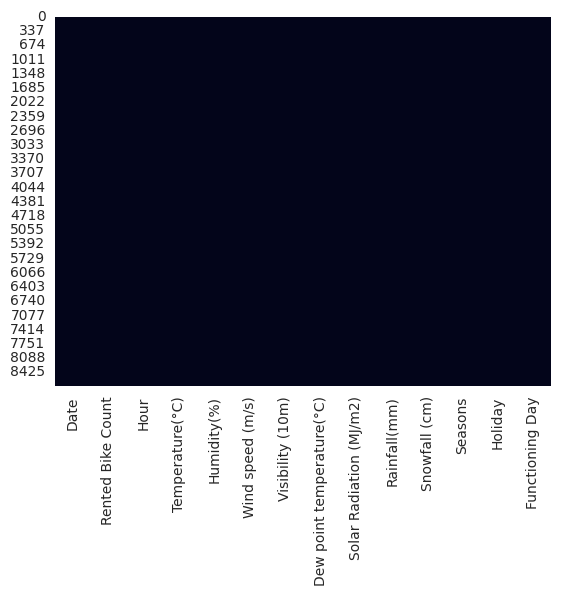

In [10]:
# Visualizing the missing values
sns.heatmap(Bike_df.isnull(), cbar=False)

### What did you know about your dataset?

There are 8760 observation and 14 features.
In a day we have 24 hours and we have 365 days a year so 365 multiplied by 24 = 8760, which represents the number of line in the dataset
There are no null values.
Dataset has all unique values i.e., there is no duplicate, which means data is free from bias as duplicates which can cause problems in downstream analysis, such as biasing results or making it difficult to accurately summarize the data.
Date has some object data types, it should be datetime data type.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
Bike_df.columns

In [ ]:
# Dataset Describe
Bike_df.describe(include='all')

### Variables Description

**Date** : The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : str, we need to convert into datetime format.

**Rented Bike Count** : Number of rented bikes per hour which our dependent variable and we need to predict that, type : int

**Hour**: The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.

**Temperature(°C)**: Temperature in Celsius, type : Float

**Humidity(%)**: Humidity in the air in %, type : int

**Wind speed (m/s)** : Speed of the wind in m/s, type : Float

**Visibility (10m)**: Visibility in m, type : int

**Dew point temperature(°C)**: Temperature at the beggining of the day, type : Float

**Solar Radiation (MJ/m2)**: Sun contribution, type : Float

**Rainfall(mm)**: Amount of raining in mm, type : Float

**Snowfall (cm)**: Amount of snowing in cm, type : Float

**Seasons**: Season of the year, type : str, there are only 4 season's in data .

**Holiday**: If the day is holiday period or not, type: str

**Functioning Day**: If the day is a Functioning Day or not, type : str

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in Bike_df.columns.tolist():
  print("No. of unique values in ",i,"is",Bike_df[i].nunique(),".")

## 3. ***Data Wrangling***

### Data Wrangling Code

In [11]:
# Write your code to make your dataset analysis ready.

bike_df=Bike_df.copy()



In [12]:
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [13]:
#Rename the complex column name
bike_df=bike_df.rename(columns={'Rented Bike Count':'Rented_bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})


In [14]:
# Changing the Date column into three 'year','month', 'day' column
bike_df['Date'] = bike_df['Date'].str.replace('-','/')
bike_df['Date'] = bike_df['Date'].apply(lambda x: pd.datetime.strptime(x, "%d/%m/%Y"))



In [18]:
bike_df['year']=bike_df['Date'].dt.year
bike_df['month']=bike_df['Date'].dt.month
bike_df['day']=bike_df['Date'].dt.day_name()


In [19]:
# Creating a new column of 'weekdays _weekend' and drop the column 'date' 'day' 'year'
bike_df['weekdays_weekend'] = bike_df['day'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)
bike_df = bike_df.drop(columns=['Date', 'day', 'year'], axis=1)


In [20]:
bike_df.head()

Rented_bike_Count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254     0         -5.2        37         2.2        2000   
1                204     1         -5.5        38         0.8        2000   
2                173     2         -6.0        39         1.0        2000   
3                107     3         -6.2        40         0.9        2000   
4                 78     4         -6.0        36         2.3        2000   

   Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall Seasons  \
0                  -17.6              0.0       0.0       0.0  Winter   
1                  -17.6              0.0       0.0       0.0  Winter   
2                  -17.7              0.0       0.0       0.0  Winter   
3                  -17.6              0.0       0.0       0.0  Winter   
4                  -18.6              0.0       0.0       0.0  Winter   

      Holiday Functioning_Day  month  weekdays_weekend  
0  No Holiday             Yes     12                 0  
1  No Holiday             Yes     12                 0  
2  No Holiday             Yes     12                 0  
3  No Holiday             Yes     12                 0  
4  No Holiday             Yes     12                 0

In [21]:

bike_df ['weekdays_weekend'].value_counts()

0    6264
1    2496
Name: weekdays_weekend, dtype: int64

In [22]:
cols=['Hour','month','weekdays_weekend']
for col in cols:
    bike_df[col] = bike_df[col].astype('category')


In [23]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  weekdays_weekend       8760 non-null   c

In [ ]:
bike_df.columns

### What all manipulations have you done and insights you found?

*So we convert the "date" column into 3 different column i.e "year","month","day".*
*The "year" column in our data set is basically contain the 2 unique number contains the details of from 2017 december to 2018 november so if i consider this is a one year then we don't need the "year" column so we drop it*.
*The other column "day", it contains the details about the each day of the month, for our relevence we don't need each day of each month data but we need the data about, if a day is a weekday or a weekend so we convert it into this format and drop the "day" column*.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

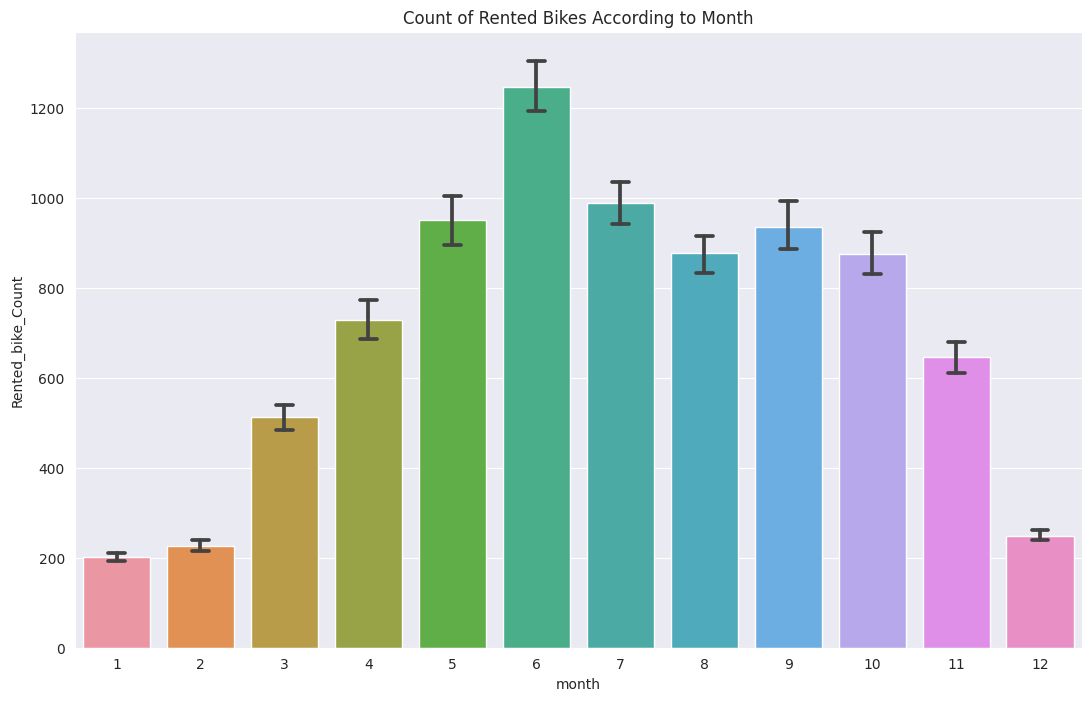

In [24]:
# Chart - 1 visualization code
fig, ax = plt.subplots(figsize=(13, 8))
sns.barplot(data=bike_df, x='month', y='Rented_bike_Count', ax=ax, capsize=.2)
ax.set(title='Count of Rented Bikes According to Month')
plt.show()

##### 1. Why did you pick the specific chart?

To visualise and spread categorical data With respect to rented by count

##### 2. What is/are the insight(s) found from the chart?

From the above bar plot we can clearly say that, from the month 5 to 10
(May - October) the demand of the rented bike is high as compare to other months.These months came inside the summer season

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the insight we can focused on others month also for this we make some offer that makes rented bike sales increase and it help to grow the demand.

#### Chart - 2

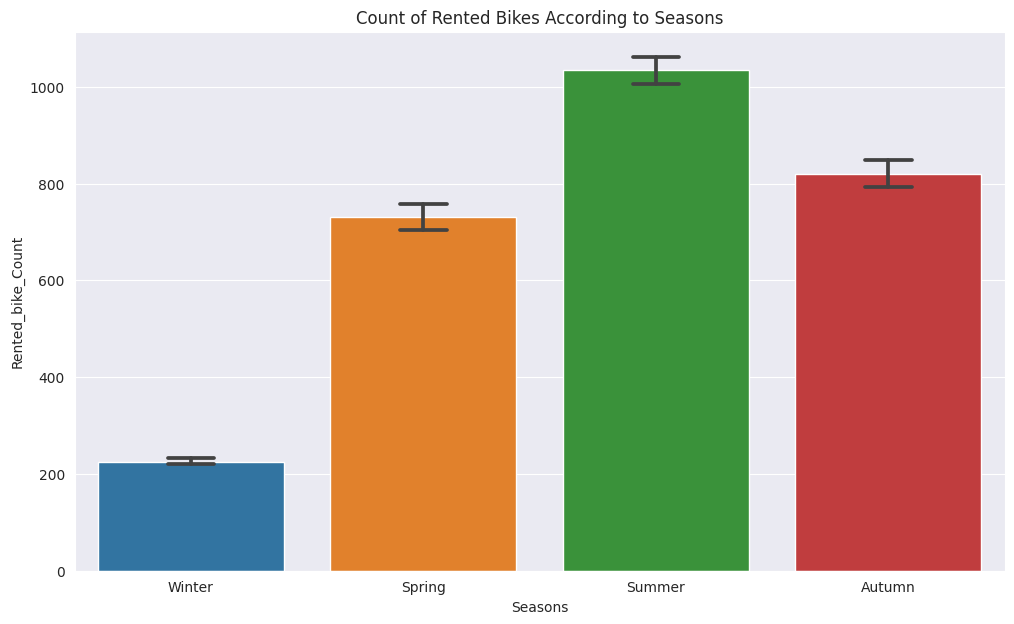

In [25]:
# Chart - 2 visualization code
fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(data=bike_df, x='Seasons', y='Rented_bike_Count', ax=ax, capsize=.2)
ax.set(title='Count of Rented Bikes According to Seasons')
plt.show()


##### 1. Why did you pick the specific chart?

In the above bar plot  which shows, the use of rented bike in four different seasons, and it clearly shows that why i pick this chart

##### 2. What is/are the insight(s) found from the chart?

Summer season having more rented bike count as compared to other season winter having low rented bike as compared to other.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We should more focused on summer and spring season that having more number of rented bike we should more focus on that and  upgrade our offer which can help to bring more rented bike in that season

#### Chart - 3

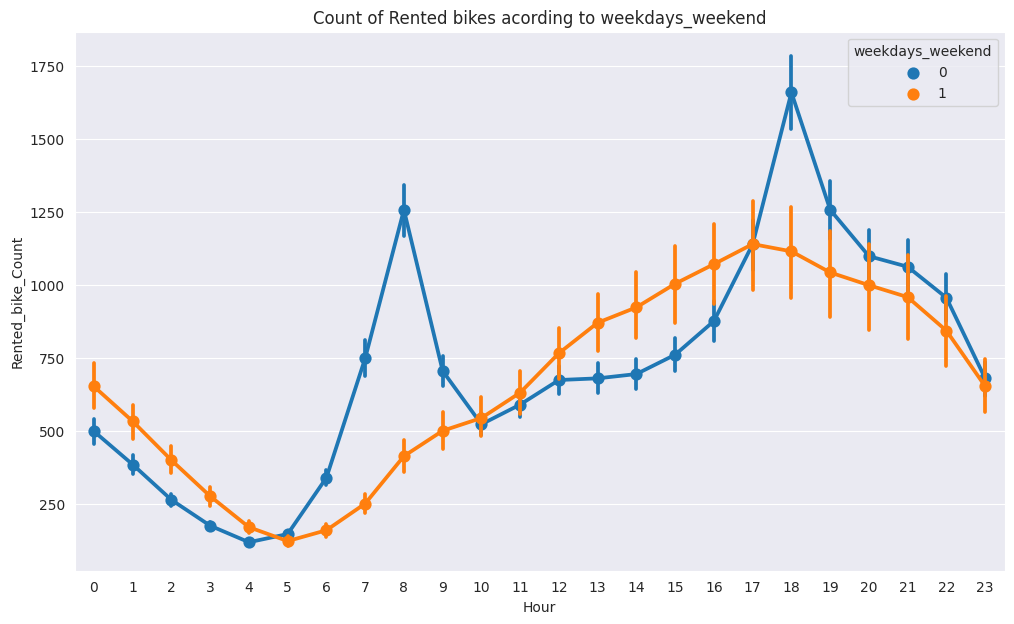

In [27]:
# Chart - 3 visualization code
fig, ax = plt.subplots(figsize=(12, 7))
sns.pointplot(data=bike_df, x='Hour', y='Rented_bike_Count', hue='weekdays_weekend', ax=ax)
ax.set(title='Count of Rented bikes acording to weekdays_weekend')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

From the above point plot and bar plot we can say that, in the week days which represent in blue colur show that the demand of the bike higher because of the office.

Peak Time are 7 am to 9 am and 5 pm to 7 pm.The orange colur represent the weekend days, and it show that the demand of rented bikes are very low specially in the morning hour but when the evening start from 4 pm to 8 pm the demand slightly increases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Demand of rented bike in the morning having very low demand. We should change some policies and offer to attract more people towards in the morning. Gave deema special offer in the morning and midday where we having low market so we can increase our bike demand in that time.

#### Chart - 4

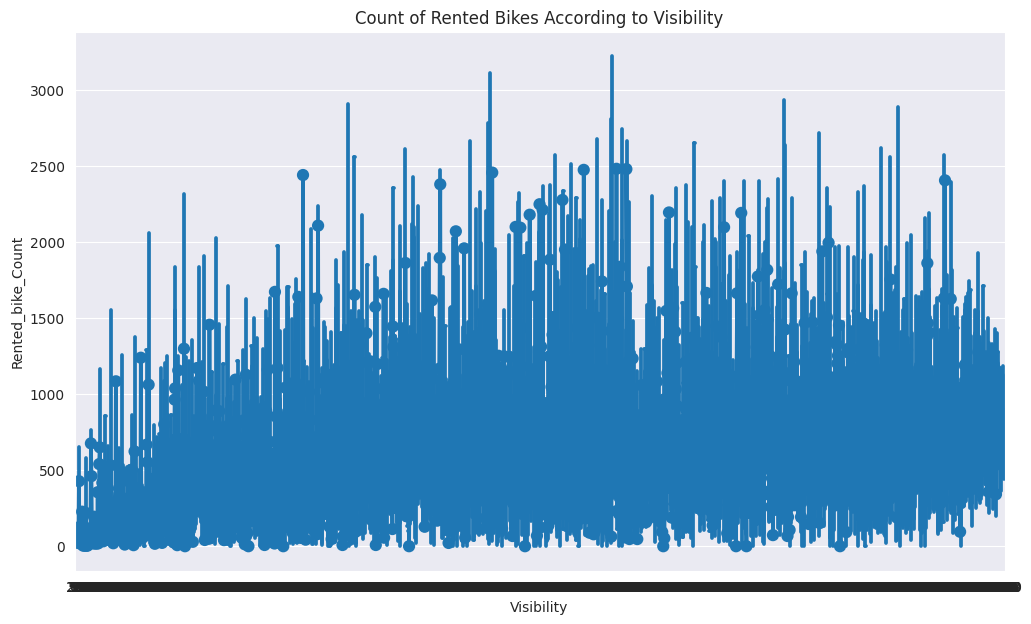

In [28]:
# Chart - 4 visualization code
fig, ax = plt.subplots(figsize=(12, 7))
sns.pointplot(data=bike_df, x='Visibility', y='Rented_bike_Count', ax=ax, capsize=.2)
ax.set(title='Count of Rented Bikes According to Visibility')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

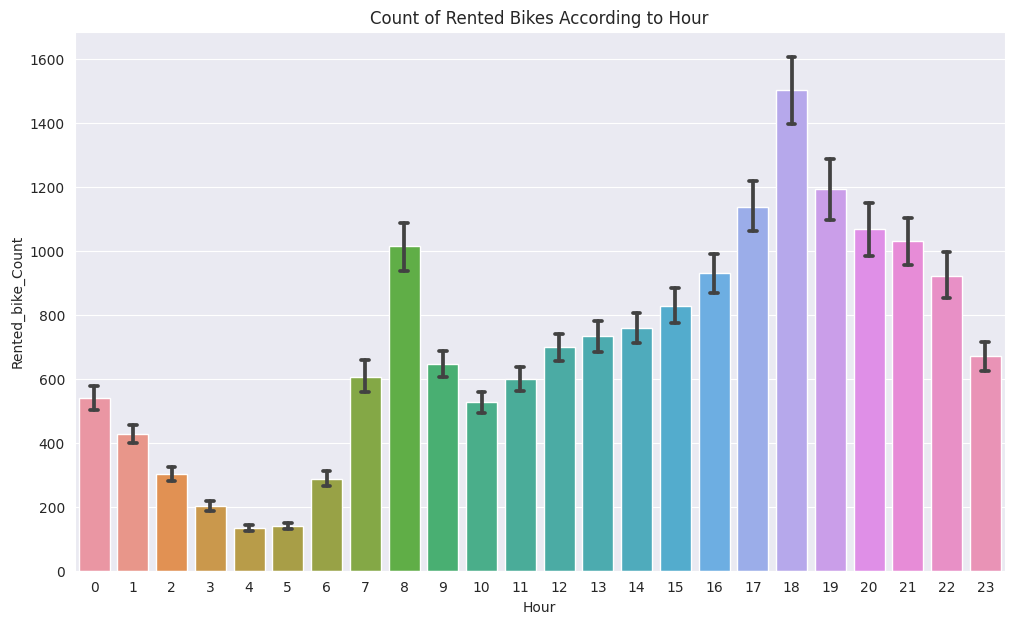

In [29]:
# Chart - 5 visualization code
fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(data=bike_df, x='Hour', y='Rented_bike_Count', ax=ax, capsize=.2)
ax.set(title='Count of Rented Bikes According to Hour')
plt.show()

##### 1. Why did you pick the specific chart?

In the above plot which shows, the use of rented bike according the hours and the data are from all over the year.

##### 2. What is/are the insight(s) found from the chart?

generally people use rented bikes during their working hour from 7am to 9am and 5pm to 7pm.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Gave them a special offer on the rented bike so we can grow and attract them and bike demand increases .

#### Chart - 6

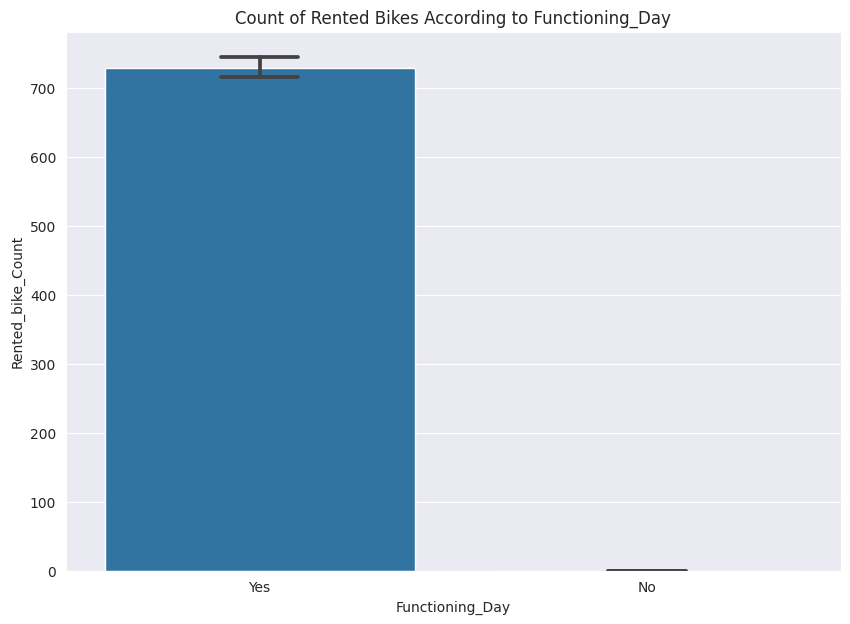

In [30]:
# Chart - 6 visualization code
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(data=bike_df, x='Functioning_Day', y='Rented_bike_Count', ax=ax, capsize=.2)
ax.set(title='Count of Rented Bikes According to Functioning_Day')
plt.show()

##### 1. Why did you pick the specific chart?

I want to see the distribution of function day and non function day so I pick this bar chart.

##### 2. What is/are the insight(s) found from the chart?

In the above bar plot and point plot which shows the use of rented bike in functioning day or non functioning day, and it clearly shows that,Peoples don't use reneted bikes in no functioning day.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Our bike demand more in function day so we more focus on the function day we can change our policies to increase our sale in the function day it can help us to grow the demand of bike.

#### Chart - 7

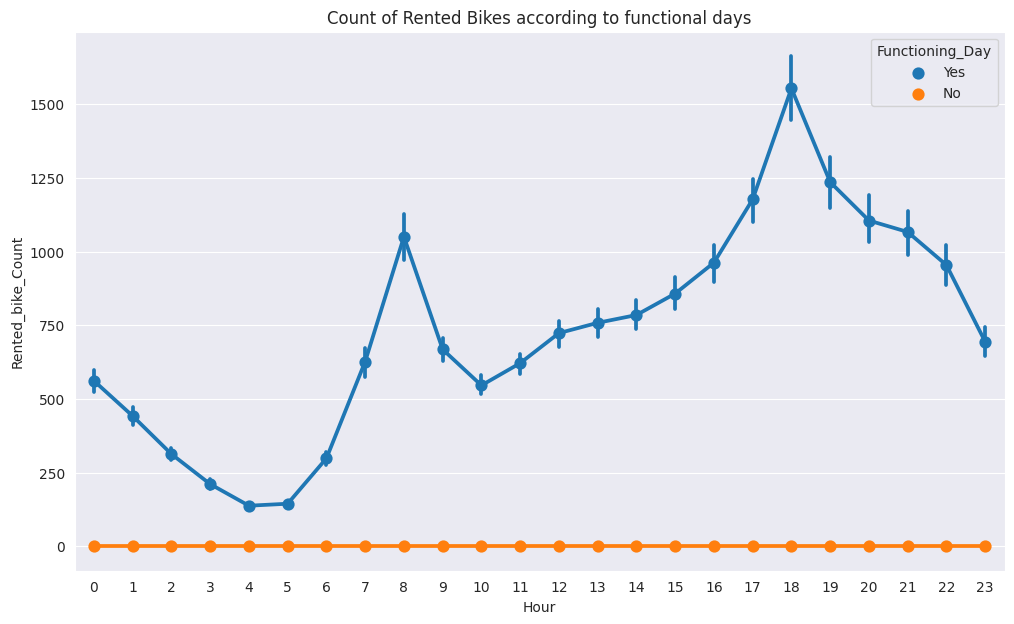

In [31]:
# Chart - 7 visualization code
fig, ax = plt.subplots(figsize=(12, 7))
sns.pointplot(data=bike_df, x='Hour', y='Rented_bike_Count', hue='Functioning_Day', ax=ax)
ax.set(title='Count of Rented Bikes according to functional days')
plt.show()


##### 1. Why did you pick the specific chart?

 In the above  point plot which shows the use of rented bike in functioning day or non functioning day, and it clearly shows that

##### 2. What is/are the insight(s) found from the chart?

Peoples don't use reneted bikes in no functioning day

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

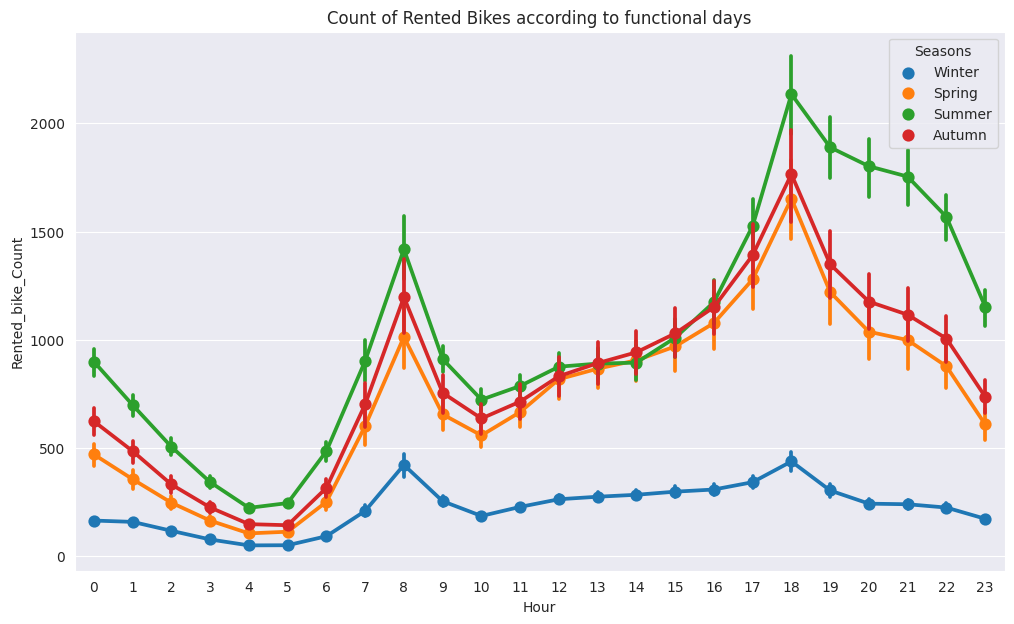

In [32]:
# Chart - 8 visualization code
fig, ax = plt.subplots(figsize=(12, 7))
sns.pointplot(data=bike_df, x='Hour', y='Rented_bike_Count', hue='Seasons', ax=ax)
ax.set(title='Count of Rented Bikes according to functional days')
plt.show()

##### 1. Why did you pick the specific chart?

In the above  point plot which shows, the use of rented bike in four different seasons, and it clearly shows that why I picl this point plot.

##### 2. What is/are the insight(s) found from the chart?

In summer season the use of rented bike is high and peak time is 7am-9am and 5pm-7pm.


In winter season the use of rented bike is very low maybe because of snowfall, fog, cold etc

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

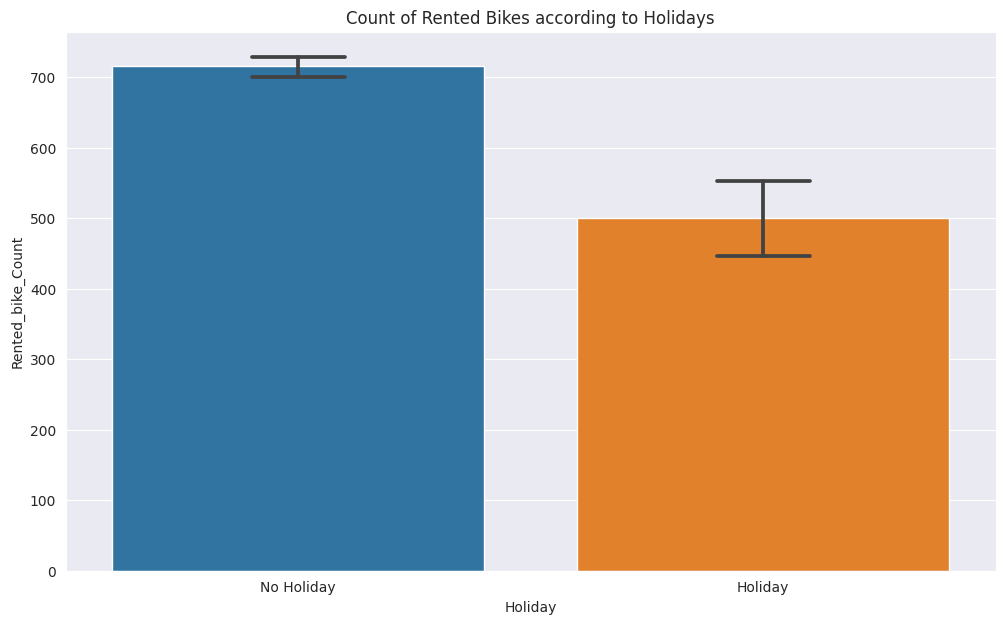

In [33]:
# Chart - 9 visualization code
fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(data=bike_df, x='Holiday', y='Rented_bike_Count', ax=ax,capsize=.2)
ax.set(title='Count of Rented Bikes according to Holidays')
plt.show()


##### 1. Why did you pick the specific chart?

I want to see the distribution of no holiday and holiday bar chart shows very clearly so that's why I picked the chart

##### 2. What is/are the insight(s) found from the chart?

Most rented bike demand on the no ho as soon in the bar chartidays as shown in the bar chart

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Most people prefer rented bike in no holiday so we can also focus on the holiday make the offer that really attract the people so we can make growth in the holidays.

Make the offer people should book the bike on the holidays and that really help in group of rented bike

#### Chart - 10

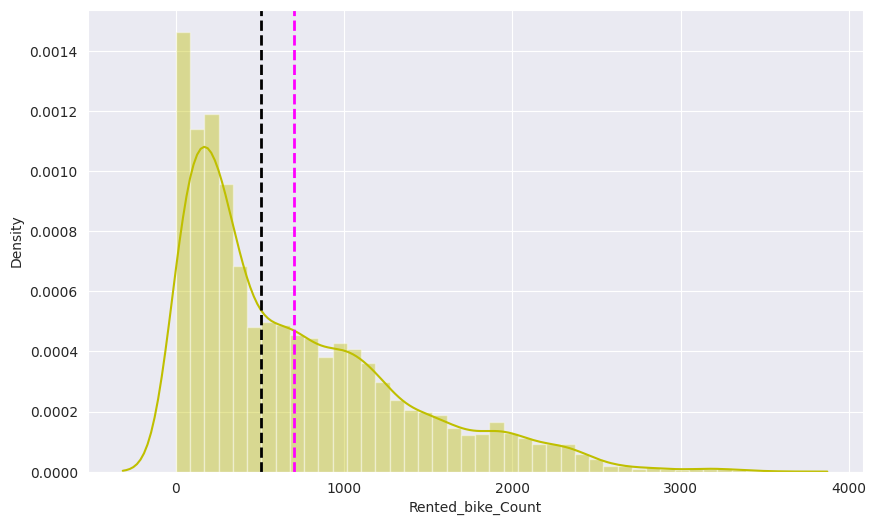

In [37]:
#printing the regression plot for all the numerical features#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
plt.xlabel('Rented_bike_Count')
plt.ylabel('Density')
ax=sns.distplot(bike_df['Rented_bike_Count'],hist=True ,color="y")
ax.axvline(bike_df['Rented_bike_Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(bike_df['Rented_bike_Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()


##### 1. Why did you pick the specific chart?

The above graph shows that, Rented Bike Count has moderate right skewness. Since the assumption of linear regression is that 'the distribution of dependent variable has to be normal', so we should perform some operation to make it normal

##### 2. What is/are the insight(s) found from the chart?

From the above we can easily said that the rented bike count has moderate right skewness.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11 - Correlation Heatmap

<Axes: >

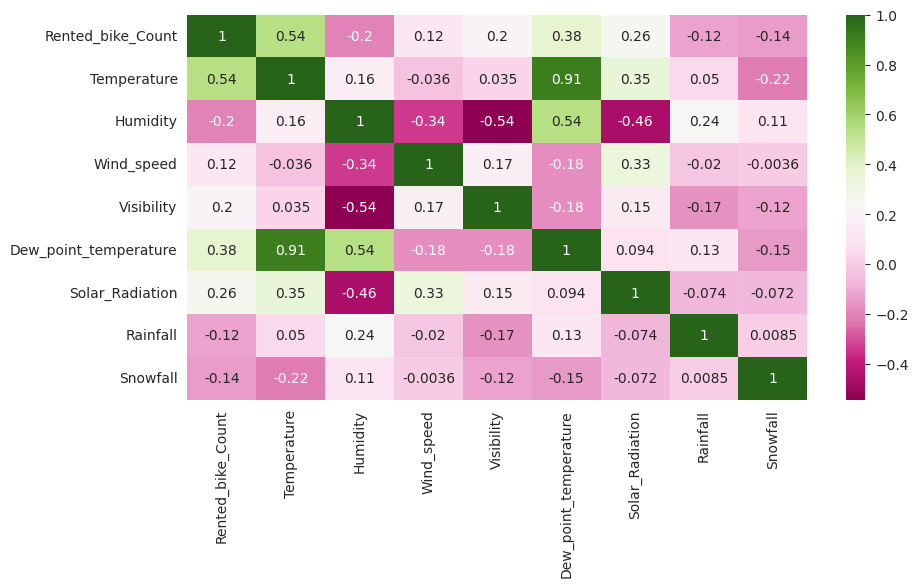

In [38]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10,5))
sns.heatmap(bike_df.corr(),cmap='PiYG',annot=True)

##### 1. Why did you pick the specific chart?

This map is use to Identifying Correlations between the Variables.

##### 2. What is/are the insight(s) found from the chart?

correlation between columns 'Temperature' and 'Dew point temperature' i.e 0.91 so even if we drop this column then it won't affect the outcome of our analysis. And they have the same variations, so we can drop the column 'Dew point temperature(°C).

#### Chart - 12 - Pair Plot

In [39]:
numeric_features=bike_df.select_dtypes(exclude=['object','category'])
numeric_features

Rented_bike_Count  Temperature  Humidity  Wind_speed  Visibility  \
0                   254         -5.2        37         2.2        2000   
1                   204         -5.5        38         0.8        2000   
2                   173         -6.0        39         1.0        2000   
3                   107         -6.2        40         0.9        2000   
4                    78         -6.0        36         2.3        2000   
...                 ...          ...       ...         ...         ...   
8755               1003          4.2        34         2.6        1894   
8756                764          3.4        37         2.3        2000   
8757                694          2.6        39         0.3        1968   
8758                712          2.1        41         1.0        1859   
8759                584          1.9        43         1.3        1909   

      Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  
0                     -17.6              0.0       0.0       0.0  
1                     -17.6              0.0       0.0       0.0  
2                     -17.7              0.0       0.0       0.0  
3                     -17.6              0.0       0.0       0.0  
4                     -18.6              0.0       0.0       0.0  
...                     ...              ...       ...       ...  
8755                  -10.3              0.0       0.0       0.0  
8756                   -9.9              0.0       0.0       0.0  
8757                   -9.9              0.0       0.0       0.0  
8758                   -9.8              0.0       0.0       0.0  
8759                   -9.3              0.0       0.0       0.0  

[8760 rows x 9 columns]

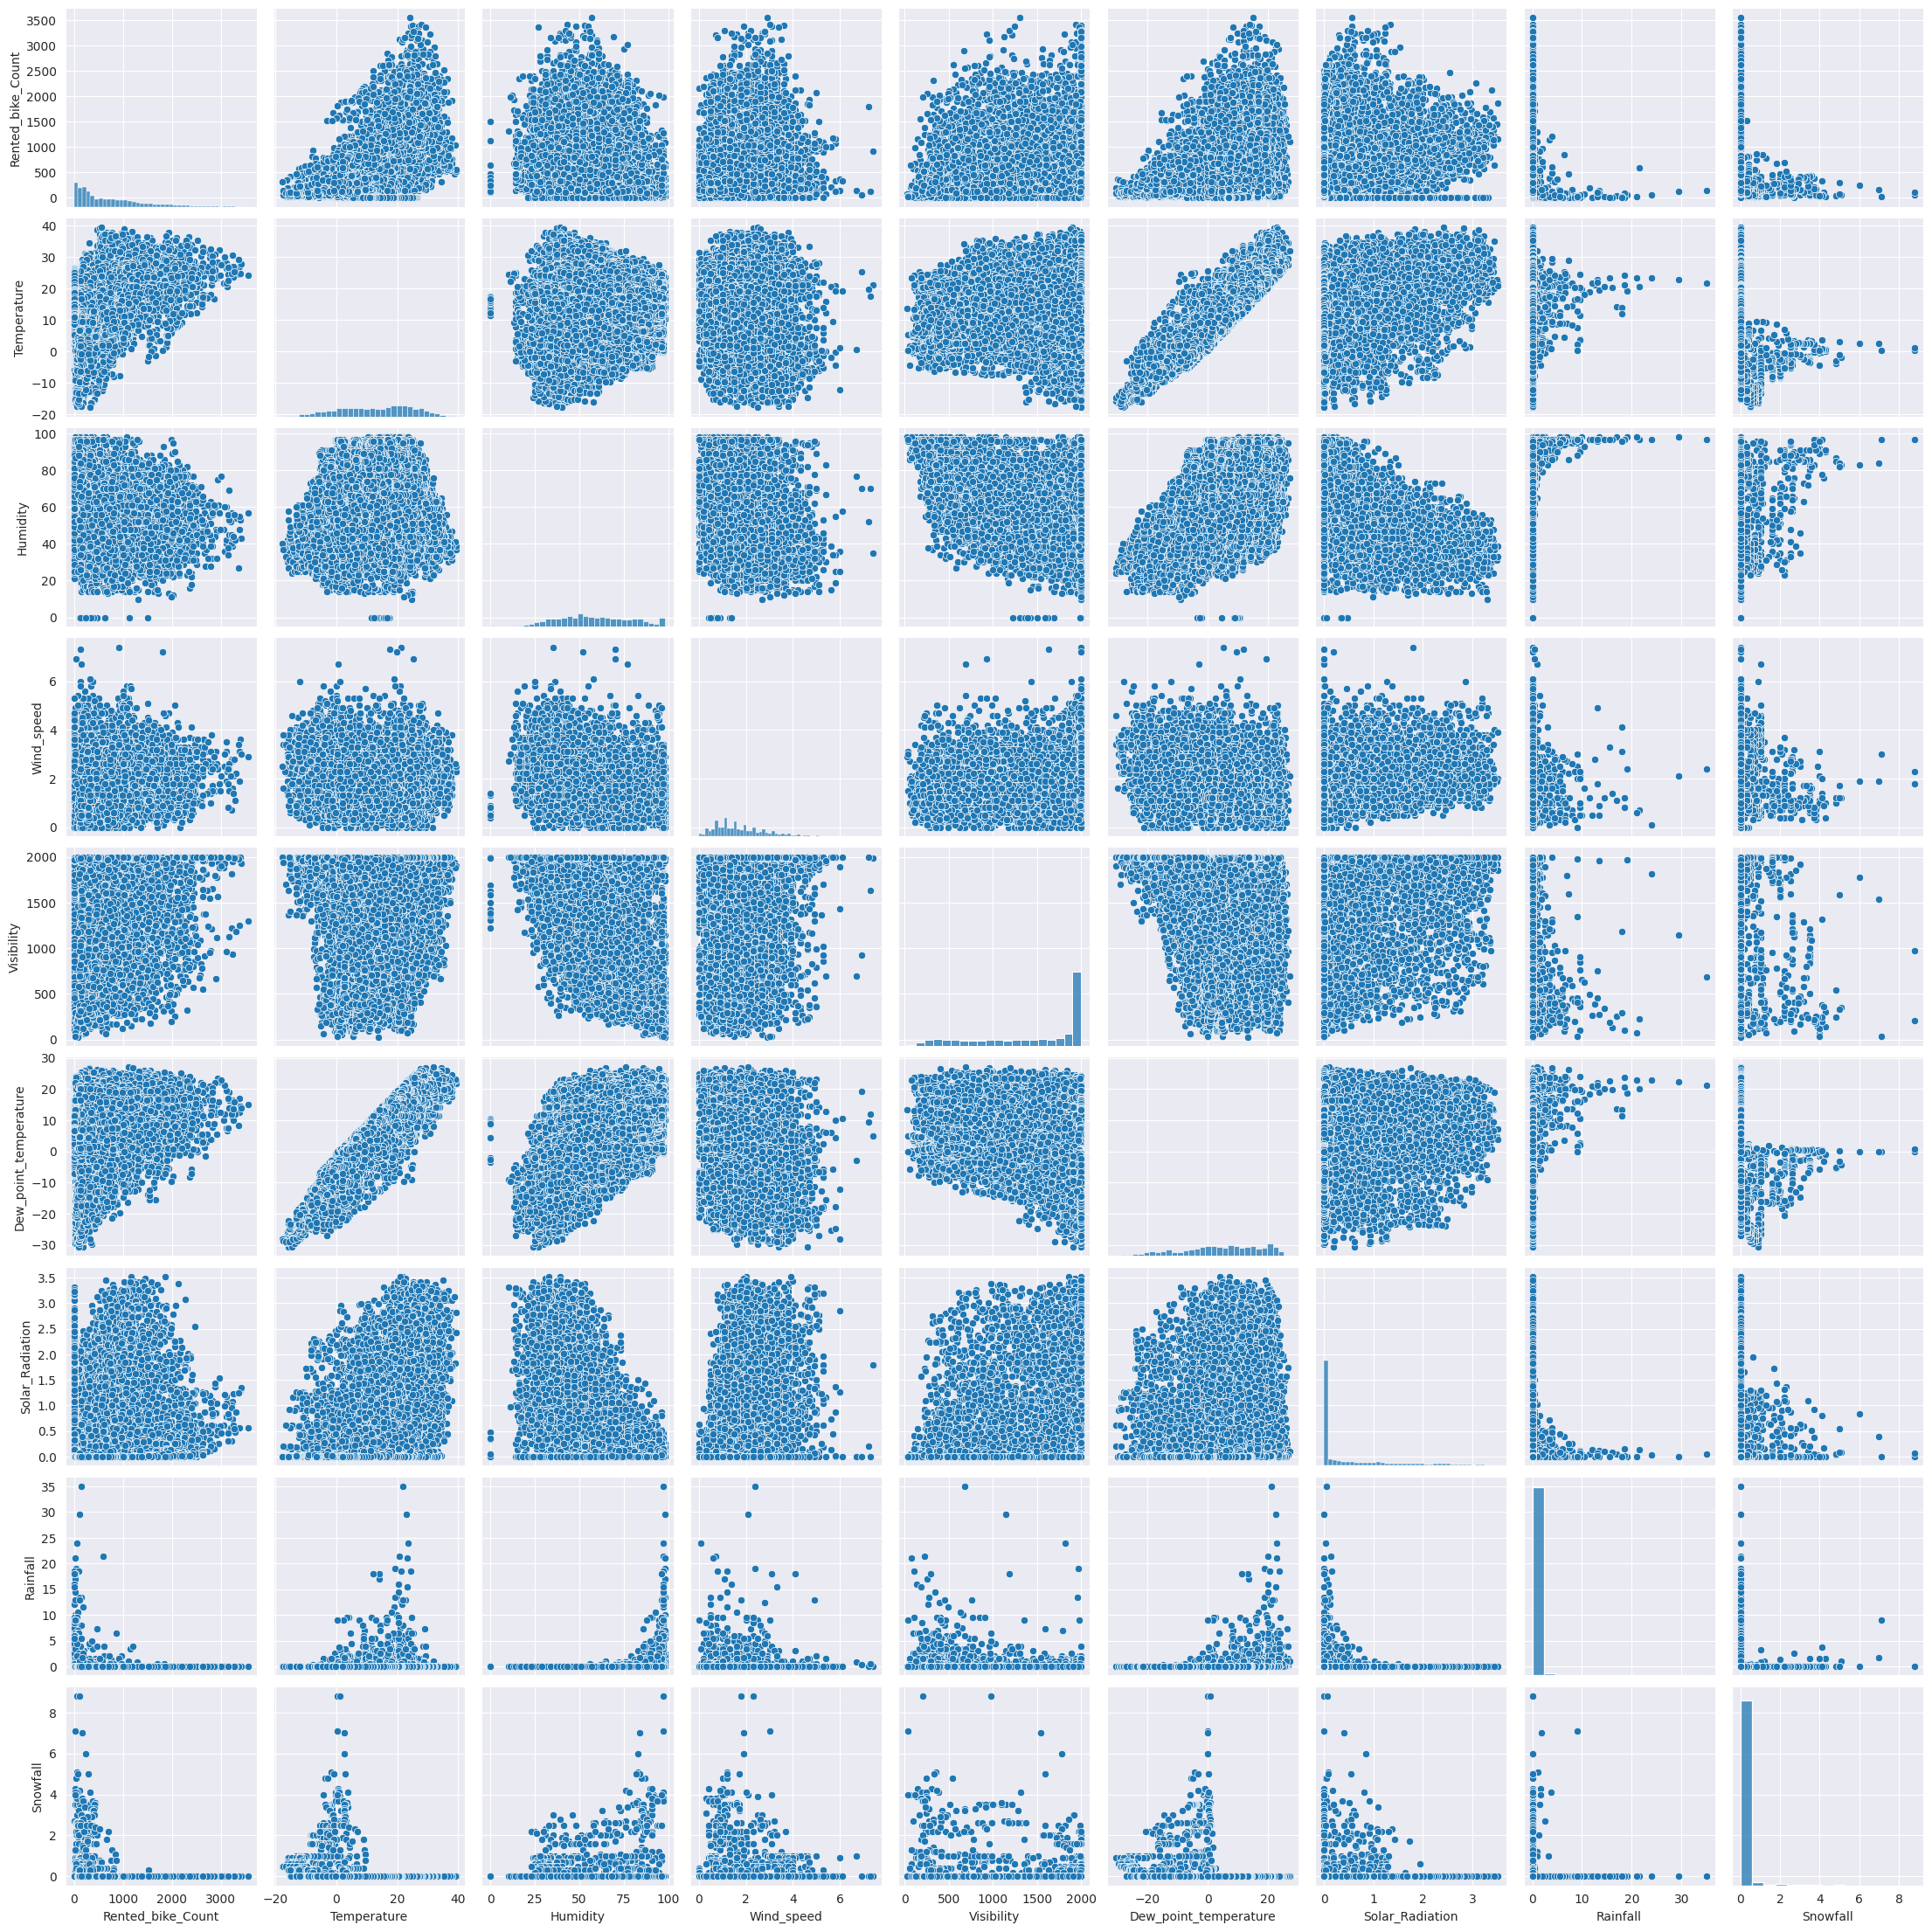

In [40]:
# Pair Plot visualization code
sns.pairplot(data=bike_df)


##### 1. Why did you pick the specific chart?

Used pair plot for visualising the relationship between multiple variables in the data set

##### 2. What is/are the insight(s) found from the chart?

Here also we can see that temperature and dew point temperature are highly correlated

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

null_hypothesis ='There is no relationship between temperature and bike demand in Seoul.'

alt_hypothesis ='There is no relationship between temperature and bike demand in Seoul.'

#### 2. Perform an appropriate statistical test.

In [41]:
# Perform Statistical Test to obtain P-Value
import statsmodels.api as sm

#Define null and alternate hypothesis
null_hypothesis = 'There is a no relationship between temperature and Rented Bike Count.'
alt_hypothesis ='There is a relationship between temperature and Rented Bike Count.'

#perform linear regression
X = sm.add_constant(bike_df['Temperature'])
y = bike_df['Rented_bike_Count']
model = sm.OLS(y,X).fit()

#print summary statistics
print(model.summary())

#Extract p-value for temperature coefficeint
p_value = model.pvalues[1]
print ('p-value:',p_value)

                            OLS Regression Results                            
Dep. Variable:      Rented_bike_Count   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     3578.
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        06:09:38   Log-Likelihood:                -67600.
No. Observations:                8760   AIC:                         1.352e+05
Df Residuals:                    8758   BIC:                         1.352e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         329.9525      8.541     38.631      

##### Which statistical test have you done to obtain P-Value?

We use the OLS (ordinary least square) function from the statsmodels package to perform a linear regression of bike demand on the temperature the P value associated with the temperature coefficient is shown under the column "P>|t|", And is equal to 0.000 in this example since this p-value is less than the significance level of 0.05 we can repeat the null hypothesis and conclude that there is evidence of a significant relationship between temperature and bike demand in seoul.

##### Why did you choose the specific statistical test?

I choose linear regression as the statistical phase to perform hypothesis testing for seoul bike sharing demand prediction because it is a commonly used method for analysing the relationship between a continuous predictor variable and a continuous response variable in this case we can interstate in determining whether there is a significant relationship between a predictor variable such as temperature or time of day and bike demand

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


null_hypothesis ='There is no relationship between month and bike demand in Seoul.'

alt_hypothesis ='There is no relationship between month and bike demand in Seoul.'

#### 2. Perform an appropriate statistical test.

In [42]:
# Perform Statistical Test to obtain P-
#Define null and alternate hypothesis
null_hypothesis = 'There is a no relationship between month and Rented Bike Count.'
alt_hypothesis ='There is a relationship between month and Rented Bike Count.'

#perform linear regression
X = sm.add_constant(bike_df['month'])
y = bike_df['Rented_bike_Count']
model = sm.OLS(y,X).fit()

#print summary statistics
print(model.summary())

#Extract p-value for temperature coefficeint
p_value = model.pvalues[1]
print ('p-value:',p_value)


                            OLS Regression Results                            
Dep. Variable:      Rented_bike_Count   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     159.0
Date:                Fri, 03 Nov 2023   Prob (F-statistic):           3.94e-36
Time:                        06:19:10   Log-Likelihood:                -69021.
No. Observations:                8760   AIC:                         1.380e+05
Df Residuals:                    8758   BIC:                         1.381e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        541.6124     14.621     37.043      0.0

##### Which statistical test have you done to obtain P-Value?

We use the OLS (ordinary least square) function from the statsmodels package to perform a linear regression of bike demand on the temperature the P value associated with the temperature coefficient is shown under the column "P>|t|", And is equal to 3.942026289025805e-36  in this example since this p-value is less than the significance level of 0.05 we can repeat the null hypothesis and conclude that there is evidence of a significant relationship between temperature and bike demand in seoul.

##### Why did you choose the specific statistical test?

I choose linear regression as the statistical phase to perform hypothesis testing for seoul bike sharing demand prediction because it is a commonly used method for analysing the relationship between a continuous predictor variable and a continuous response variable in this case we can interstate in determining whether there is a significant relationship between a predictor variable such as temperature or time of day and bike demand

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

null_hypothesis ='There is no relationship between  Hour and bike demand in Seoul.'

alt_hypothesis ='There is no relationship between Hour and bike demand in Seoul.'

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
null_hypothesis = 'There is a no relationship between Hour and Rented Bike Count.'
alt_hypothesis ='There is a relationship between Hour and Rented Bike Count.'

#perform linear regression
X = sm.add_constant(bike_df['Hour'])
y = bike_df['Rented_bike_Count']
model = sm.OLS(y,X).fit()

#print summary statistics
print(model.summary())

#Extract p-value for temperature coefficeint
p_value = model.pvalues[1]
print ('p-value:',p_value)



##### Which statistical test have you done to obtain P-Value?

We use the OLS (ordinary least square) function from the statsmodels package to perform a linear regression of bike demand on the temperature the P value associated with the temperature coefficient is shown under the column "P>|t|", And is equal to 0.000 in this example since this p-value is less than the significance level of 0.05 we can repeat the null hypothesis and conclude that there is evidence of a significant relationship between temperature and bike demand in seoul.

##### Why did you choose the specific statistical test?

 choose linear regression as the statistical phase to perform hypothesis testing for seoul bike sharing demand prediction because it is a commonly used method for analysing the relationship between a continuous predictor variable and a continuous response variable in this case we can interstate in determining whether there is a significant relationship between a predictor variable such as temperature or time of day and bike demand

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [43]:
# Handling Missing Values & Missing Value Imputation
#checking if there is any null values in dataset
bike_df.isnull().sum()

Rented_bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
month                    0
weekdays_weekend         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments


#Transformation has taken care of outliers, so no need to treat outliers.

### 3. Categorical Encoding

In [44]:
# Encode your categorical columns

#Assign all categorical features to a variable
categorical_features=list(bike_df.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekdays_weekend'],
      dtype='object')

In [45]:
#creat a copy
bike_df_copy = bike_df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    bike_df_copy = one_hot_encoding(bike_df_copy, col)
bike_df_copy.head()

Rented_bike_Count  Temperature  Humidity  Wind_speed  Visibility  \
0                254         -5.2        37         2.2        2000   
1                204         -5.5        38         0.8        2000   
2                173         -6.0        39         1.0        2000   
3                107         -6.2        40         0.9        2000   
4                 78         -6.0        36         2.3        2000   

   Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  Hour_1  ...  \
0                  -17.6              0.0       0.0       0.0       0  ...   
1                  -17.6              0.0       0.0       0.0       1  ...   
2                  -17.7              0.0       0.0       0.0       0  ...   
3                  -17.6              0.0       0.0       0.0       0  ...   
4                  -18.6              0.0       0.0       0.0       0  ...   

   month_4  month_5  month_6  month_7  month_8  month_9  month_10  month_11  \
0        0        0        0        0        0        0         0         0   
1        0        0        0        0        0        0         0         0   
2        0        0        0        0        0        0         0         0   
3        0        0        0        0        0        0         0         0   
4        0        0        0        0        0        0         0         0   

   month_12  weekdays_weekend_1  
0         1                   0  
1         1                   0  
2         1                   0  
3         1                   0  
4         1                   0  

[5 rows x 49 columns]

In [46]:

#Assign the value in X and Y
X = bike_df_copy.drop(columns=['Rented_bike_Count'], axis=1)
y = np.sqrt(bike_df_copy['Rented_bike_Count'])

In [47]:


X.head()

Temperature  Humidity  Wind_speed  Visibility  Dew_point_temperature  \
0         -5.2        37         2.2        2000                  -17.6   
1         -5.5        38         0.8        2000                  -17.6   
2         -6.0        39         1.0        2000                  -17.7   
3         -6.2        40         0.9        2000                  -17.6   
4         -6.0        36         2.3        2000                  -18.6   

   Solar_Radiation  Rainfall  Snowfall  Hour_1  Hour_2  ...  month_4  month_5  \
0              0.0       0.0       0.0       0       0  ...        0        0   
1              0.0       0.0       0.0       1       0  ...        0        0   
2              0.0       0.0       0.0       0       1  ...        0        0   
3              0.0       0.0       0.0       0       0  ...        0        0   
4              0.0       0.0       0.0       0       0  ...        0        0   

   month_6  month_7  month_8  month_9  month_10  month_11  month_12  \
0        0        0        0        0         0         0         1   
1        0        0        0        0         0         0         1   
2        0        0        0        0         0         0         1   
3        0        0        0        0         0         0         1   
4        0        0        0        0         0         0         1   

   weekdays_weekend_1  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  

[5 rows x 48 columns]

In [48]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_bike_Count, dtype: float64

In [49]:
#Create test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)


(6570, 48)
(2190, 48)


In [50]:
bike_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_bike_Count      8760 non-null   int64  
 1   Temperature            8760 non-null   float64
 2   Humidity               8760 non-null   int64  
 3   Wind_speed             8760 non-null   float64
 4   Visibility             8760 non-null   int64  
 5   Dew_point_temperature  8760 non-null   float64
 6   Solar_Radiation        8760 non-null   float64
 7   Rainfall               8760 non-null   float64
 8   Snowfall               8760 non-null   float64
 9   Hour_1                 8760 non-null   uint8  
 10  Hour_2                 8760 non-null   uint8  
 11  Hour_3                 8760 non-null   uint8  
 12  Hour_4                 8760 non-null   uint8  
 13  Hour_5                 8760 non-null   uint8  
 14  Hour_6                 8760 non-null   uint8  
 15  Hour

In [51]:
bike_df_copy.describe().columns

Index(['Rented_bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6',
       'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12',
       'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18',
       'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'Holiday_No Holiday',
       'Functioning_Day_Yes', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'weekdays_weekend_1'],
      dtype='object')

#### What all categorical encoding techniques have you used & why did you use those techniques?

A one hot encoding allows the representation of categorical data to be more expressive. Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [53]:
# Select your features wisely to avoid overfitting
# Independent Variables

### 5. Data Transformation

Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
# Not needed

### 6. Data Scaling

In [ ]:
# Scaling your data
# Need to done after train_test_split
#scaler = MinMaxScaler()
#x_train = scaler.fit_transform(x_train)
#x_test = scaler.transform(x_test)

##### Which method have you used to scale you data and why?

I am using MinMaxScaler.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?
 no needed

No, Because I have only few features in my dataset, Due to that dimensionality reduction is not necessary.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

No, dataset is not imbalanced.

## ***7. ML Model Implementation***

### ML Model - 1

**Linear Regression**

In [54]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model


#import the packages
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)




In [55]:

#check the score
reg.score(X_train, y_train)

0.7739500178860266

In [56]:

#check the coefficeint
reg.coef_

array([ 1.00716430e-01, -2.37171095e-01, -3.83514579e-02,  9.89292762e-04,
        4.48649754e-01,  1.10233082e+00, -1.42620210e+00,  1.97988853e-02,
       -2.02001246e+00, -4.95378959e+00, -7.24401536e+00, -9.50159767e+00,
       -9.04615325e+00, -3.99911519e+00,  2.25436221e+00,  7.48518526e+00,
        1.08263864e+00, -3.47160329e+00, -3.60398174e+00, -2.84952971e+00,
       -2.96884880e+00, -3.08067403e+00, -1.73357996e+00,  3.00563252e-01,
        4.01127439e+00,  1.03848640e+01,  6.87256706e+00,  6.09265423e+00,
        6.19988288e+00,  5.03861312e+00,  1.45957498e+00, -4.03596659e-01,
       -1.45360507e+00, -4.68852171e+00,  3.49141047e+00,  2.83549564e+01,
       -6.62050082e-01, -1.51944633e+00, -4.35688691e-01,  1.55153836e+00,
        4.42646814e+00, -1.82821742e+00, -4.05185579e+00,  4.72139757e-01,
        3.29429867e+00,  2.77928502e+00,  2.13133779e+00, -1.34812601e+00])

In [57]:

#get the X_train and X-test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


In [58]:
#import the packages
from sklearn.metrics import mean_squared_error, mean_absolute_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )



MSE : 34.80959018818959
RMSE : 5.8999652700833405
MAE : 4.444157962699084
R2 : 0.7739500178860266
Adjusted R2 : 0.7688821060964559


2. Cross- Validation & Hyperparameter Tuning

In [59]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [60]:

#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)

#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )


MSE : 33.085480278369374
RMSE : 5.75199793796637
MAE : 4.373223624494952
R2 : 0.7905536900393838
Adjusted R2 : 0.7858580231182677


**The test set's r2_score is 0.80. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

In [ ]:

### Heteroscadacity - Residual plot
plt.scatter((y_pred_test),(y_test)-(y_pred_test))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
# Actual Price vs predicte for Linear Regression plot
plt.figure(figsize=(10,8))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV hyperparameter optimization technique which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The test set's r2_score is 0.80. This means our linear model is performing well on the data

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

MAE (Mean Absolute Error):: Both models have low MAE, indicating accurate predictions that can improve business decision-making and resource allocation.

MSE (Mean Squared Error): Both models have low MSE, reducing errors in decision-making, especially for significant impacts on the business.

RMSE (Root Mean Squared Error): Similar RMSE values indicate a clear understanding of typical prediction error magnitudes, aiding informed business decisions.

R2 Score (R-squared): High R2 scores for both models suggest effective capturing of data patterns, enabling accurate forecasting and informed decisions.

Adjusted R2 Score (Adjusted R-squared): Identical scores imply similar performance in explaining variance while maintaining model simplicity, which can lead to cost-effective modeling.

In summary, both models offer accurate predictions, reduced errors, and better decision support, positively impacting the business.

### ML Model - 2


###**Lasso Regression**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [66]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [67]:
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.387939387361117 0.40607960378573027


In [68]:
#get the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [69]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 91.45820496549345
RMSE : 9.563378323871405
MAE : 7.242373211166085
R2 : 0.40607960378573027
Adjusted R2 : 0.392764246934593


**Looks like train set's r2 score value is 0.39 that means our model is not able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [70]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [71]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 96.68501360772724
RMSE : 9.832853787569876
MAE : 7.4419572551489805
R2 : 0.387939387361117
Adjusted R2 : 0.3742173371945283


**The test set's r2_score is 0.38. This means our linear model is not performing well on the data**

In [73]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
bike_df=bike_df.append(dict2,ignore_index=True)

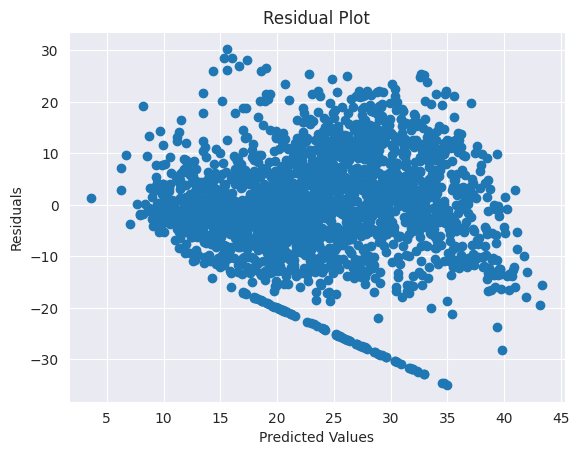

In [74]:
### Heteroscadacity- Residual plot
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

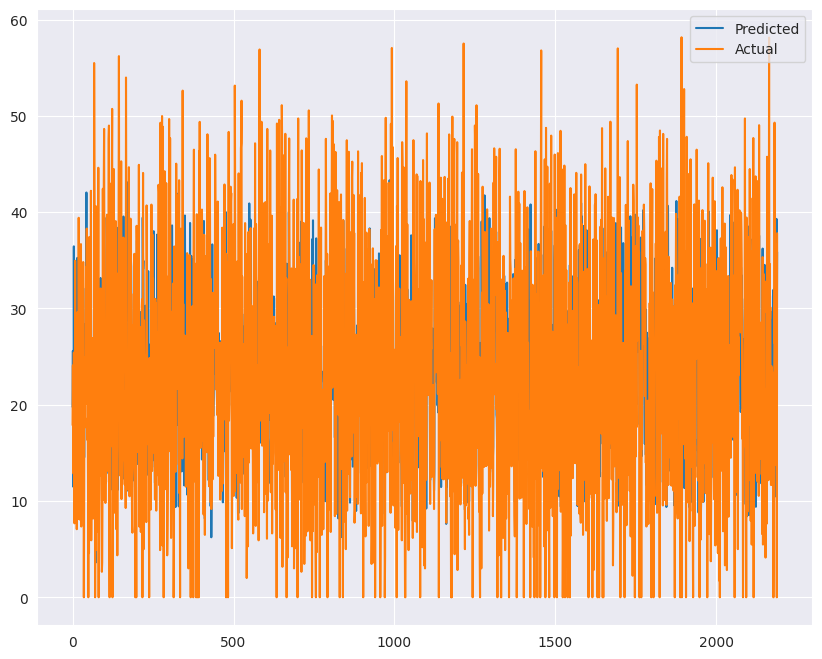

In [75]:
#Plot the figure
plt.figure(figsize=(10,8))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV hyperparameter optimization technique.It's a good choice when you have a limited number of hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

MSE : 96.68501360772724
RMSE : 9.832853787569876
MAE : 7.4419572551489805
R2 : 0.387939387361117
Adjusted R2 : 0.3742173371945283

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

MAE (Mean Absolute Error):: Both models have low MAE, indicating accurate predictions that can improve business decision-making and resource allocation.

MSE (Mean Squared Error): Both models have low MSE, reducing errors in decision-making, especially for significant impacts on the business.

RMSE (Root Mean Squared Error): Similar RMSE values indicate a clear understanding of typical prediction error magnitudes, aiding informed business decisions.

R2 Score (R-squared): High R2 scores for both models suggest effective capturing of data patterns, enabling accurate forecasting and informed decisions.

Adjusted R2 Score (Adjusted R-squared): Identical scores imply similar performance in explaining variance while maintaining model simplicity, which can lead to cost-effective modeling.





### ML Model - 3
###**RANDOM FOREST**

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [93]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model


#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [94]:

# Making predictions on train and test data

y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)

In [81]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

#calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9896900439333904
MSE : 1.5876371330831156
RMSE : 1.2600147352642808
MAE : 0.8070707247211111
R2 : 0.9896900439333904
Adjusted R2 : 0.9894589005932702


**The r2_score for the test set is 0.68. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**

In [90]:

# storing the test set metrics value in a dataframe for later compariso
from sklearn.tree import DecisionTreeRegressor

# Create and train a Decision Tree Regression model
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

# Predict on the test data
y_pred_test_tree = tree_reg.predict(X_test)

# Calculate metrics for Decision Tree Regression
MSE_d = mean_squared_error(y_test, y_pred_test_tree)
RMSE_d = np.sqrt(MSE_d)
MAE_d = mean_absolute_error(y_test, y_pred_test_tree)
r2_d = r2_score(y_test, y_pred_test_tree)
Adjusted_R2_d = (1 - (1 - r2_d) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1)))

# Store the test set metrics value in the DataFrame
dict2 = {
    'Model': 'Decision Tree Regression',
    'MAE': round(MAE_d, 3),
    'MSE': round(MSE_d, 3),
    'RMSE': round(RMSE_d, 3),
    'R2_score': round(r2_d, 3),
    'Adjusted R2': round(Adjusted_R2_d, 2)
}

bike_df = bike_df.append(dict2, ignore_index=True)



In [95]:

#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 12.82044135796077
RMSE : 3.5805643909809484
MAE : 2.237832339529196
R2 : 0.9188407086160124
Adjusted R2 : 0.9170211635499539


**The r2_score for the test set is 0.91. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**

In [97]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
bike_df=bike_df.append(dict2,ignore_index=True)

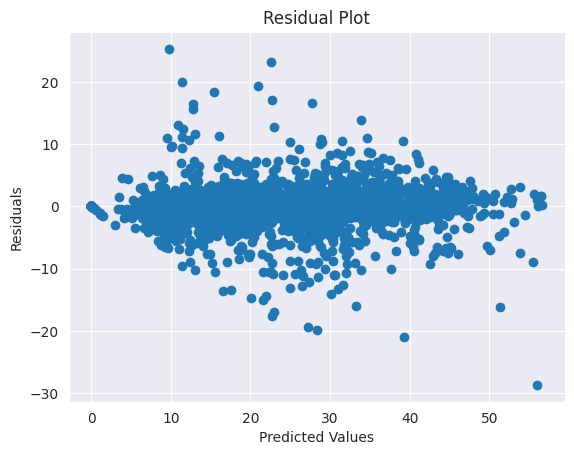

In [98]:

### Heteroscadacity- Residual plot
plt.scatter((y_pred_test_r),(y_test)-(y_pred_test_r))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [100]:
rf_model.feature_importances_


array([3.10257233e-01, 1.54655174e-01, 1.16216379e-02, 1.09343941e-02,
       1.92882935e-02, 2.97720373e-02, 3.14552868e-02, 1.39441670e-03,
       4.81585568e-03, 1.30817231e-02, 2.01526367e-02, 2.87623699e-02,
       2.49035351e-02, 7.83507310e-03, 3.95939849e-03, 1.50099124e-02,
       1.00212632e-03, 1.91040045e-03, 1.01380571e-03, 2.55085876e-04,
       2.36693669e-04, 3.56518829e-04, 1.50222260e-03, 3.40831362e-03,
       1.05859454e-02, 3.04634661e-02, 1.70257513e-02, 1.18941934e-02,
       1.25188399e-02, 1.06439438e-02, 3.68581623e-03, 3.91492969e-03,
       8.78079672e-04, 8.63151734e-03, 3.58447136e-03, 1.50067678e-01,
       2.81540877e-04, 3.65366520e-03, 1.29228156e-03, 1.49046395e-03,
       2.11301966e-03, 6.29626538e-04, 1.23508667e-03, 7.48344401e-04,
       2.84981742e-03, 4.96047822e-03, 7.29240963e-04, 1.85376579e-02])

In [101]:

importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)


In [102]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [103]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
0             Temperature                0.31
35    Functioning_Day_Yes                0.15
1                Humidity                0.15
11                 Hour_4                0.03
25                Hour_18                0.03
5         Solar_Radiation                0.03
6                Rainfall                0.03
26                Hour_19                0.02
15                 Hour_8                0.02
12                 Hour_5                0.02
47     weekdays_weekend_1                0.02
10                 Hour_3                0.02
4   Dew_point_temperature                0.02
2              Wind_speed                0.01
33         Seasons_Winter                0.01
9                  Hour_2                0.01
28                Hour_21                0.01
27                Hour_20                0.01
3              Visibility                0.01
29                Hour_22                0.01
24                Hour_17                0.01
13                 Hour_6                0.01
21                Hour_14                0.00
46               month_12                0.00
45               month_11                0.00
44               month_10                0.00
43                month_9                0.00
42                month_8                0.00
41                month_7                0.00
40                month_6                0.00
39                month_5                0.00
38                month_4                0.00
37                month_3                0.00
36                month_2                0.00
20                Hour_13                0.00
14                 Hour_7                0.00
32         Seasons_Summer                0.00
31         Seasons_Spring                0.00
30                Hour_23                0.00
8                  Hour_1                0.00
16                 Hour_9                0.00
17                Hour_10                0.00
18                Hour_11                0.00
19                Hour_12                0.00
7                Snowfall                0.00
23                Hour_16                0.00
22                Hour_15                0.00
34     Holiday_No Holiday                0.00

In [104]:
#FIT THE MODEL
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [105]:
RandomForestRegressor()

RandomForestRegressor()

**In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org**

In [106]:

features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

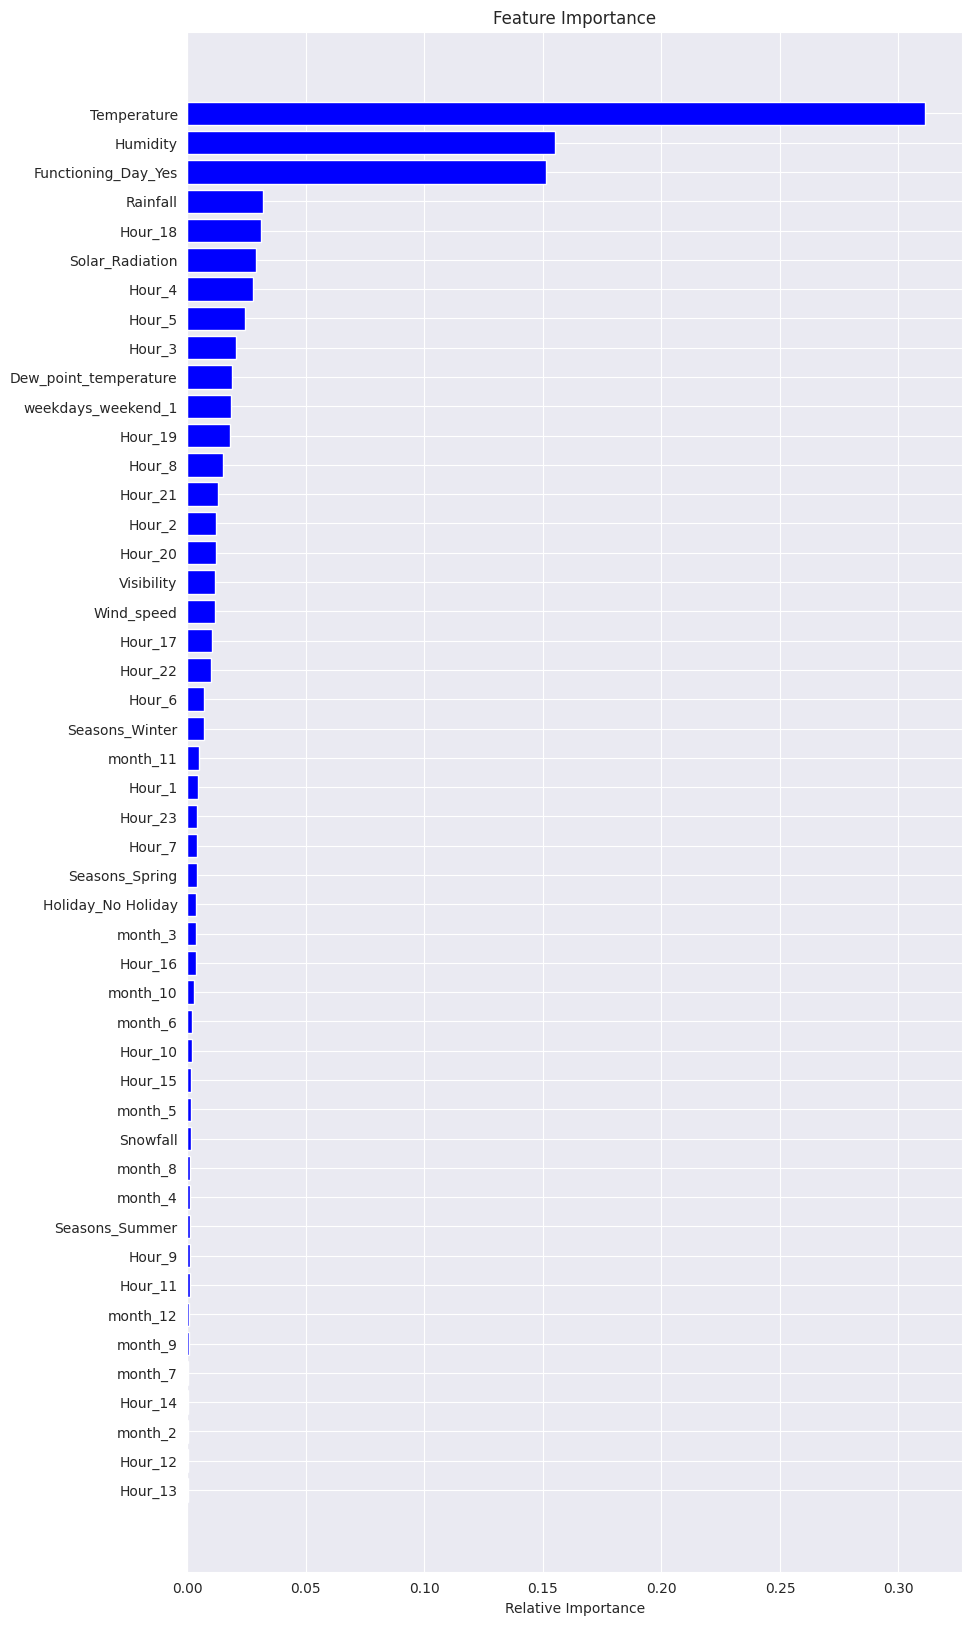

In [107]:

#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV is used in Random Forest and other models because it Automates and saves time in hyperparameter tuning. GridSearchCV incorporates cross-validation for robust evaluation.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

MSE : 12.82044135796077
RMSE : 3.5805643909809484
MAE : 2.237832339529196
R2 : 0.9188407086160124
Adjusted R2 : 0.9170211635499539

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I consider MAE, MSE, RMSE, R2 score, Adjusted R2 score as an Evaluation metrics.

Mean Absolute Error (MAE): Measures the average magnitude of prediction errors. Useful for assessing how close the model's predictions are to actual rented bike demand prediction.

Mean Squared Error (MSE): Measures the average squared prediction errors. Penalizes larger errors, making it important for precise bike demand prediction.

Root Mean Squared Error (RMSE): Measure prediction accuracy and are easy to interpret.Provides a clear understanding of typical prediction error magnitudes

R2 Score (R-squared): Indicates how well the model explains the variation in bike demand prediction. A higher R2 score implies better understanding of data variability.

Adjusted R2 Score : It helps control model complexity. It helps ensure that adding more features to the model adds value rather than complexity,

Collectively, these metrics offer a holistic assessment of model performance, helping businesses make informed decisions, reduce costs, and improve forecasting accuracy, ultimately leading to a positive business impact.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I will choose Random Forest as my final prediction  model.

Because Random forest model has the lowest Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE), indicating better prediction accuracy. It has higher R2 score indicates a better fit to the data. All three models (Lr, Lasso, and Random forest) have identical Adjusted R2 scores, It helps control model complexity while maximizing explanatory power.

This accuracy can give me a more informed business decisions, improved forecasting, and potentially positive business impact by reducing errors and uncertainties in various applications.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

I will use SHAP (SHapley Additive exPlanations) as model explainability tool.

# **Conclusion**

During our analysis, we conducted an initial exploratory data analysis (EDA) on all the features in our dataset. Firstly, we analysed our dependent variable 'Rented Bike count' and applied transformations as necessar. We then examined the categorical variables and removed those with majority of one class. We also studied the numerical variables, calculated their correlations, distribution and the their relationships with the dependent variable. Additionally we removed some numerical features that contained mostly 0 values and applied one-hot encoding to the categorical variables.
Subsequently, we employed 7 machine learning algorithms including Linear Regression,Lasso , Decision tree.


*   Temperatue, Functioning_Day_Yes, Humidity, Rainfall and Solar radiation are major driving factors for the Bike rent demand.

*   Bike demand shows peek around 8-9 AM in the morning and 6 - 7pm in the evening.
*   People prefer to rent bike more in summer than in winter.

*   Bike demand is more on clear days than on snowy or rainy days.
*   Temperature range from 22 to 25(°C) has more demand for bike



Although the current analysis may be insightful, it is important to note that the dataset is time-dependent and variables such as temperature, windspeed and solar radiation may not always remain consistent. As a result there may be situations where the model fails to perform well. As field of machine learning is constantly evolving, it is necessary to stay up-to-date with the latest developments and be prepared to handle unexpected scenarios. Maintaining a strong understanding of Machine Learning concepts will undoubtely provide an advantage in staying ahead in the future.






### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***